In [1]:
# Import needed functionalities
import numpy as np
import pandas as pd
import scipy.spatial.distance as ssd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn import preprocessing

In [2]:
# Import datasets
data3Dfull = pd.read_csv('data/data3.csv')
data6Dfull = pd.read_csv('data/data6.csv')

df = pd.read_csv("data/data3.csv")

In [3]:
# method to sample a dataset (hardcoded seed for randomized selection, see alternatives in comment)
def get_sample_from_dataset(prop, dataset):
    # randomly define sample from dataset
    # good seeds to try: 13, 42, 1123, 5813, 213455
    np.random.seed(seed=42)
    # We are going to use bootstrapping
    sample_proportion =  prop
    dataset_size = len(dataset)
    sample_size = sample_proportion * dataset_size
    # perform scaling on the dataset
    dataset = preprocessing.scale(df)
    # Turn into a pandas array again
    dataset = pd.DataFrame({'Column1':dataset[:,0],'Column2':dataset[:,1],'Column3':dataset[:,2]})
    
    print("The sample size we are going to use will be: "+ str(sample_size))
    # Run the sampling
    chosen_idx = np.random.choice(dataset_size, replace=False, size=int(sample_size))
    sampled_dataset =  dataset.iloc[chosen_idx]
    print("The new shape of the sampled dataset is: " + str(sampled_dataset.values.shape))
    return sampled_dataset

In [4]:
data3D = get_sample_from_dataset(0.05, data3Dfull)
data3D.columns = ['V1', 'V2', 'V3']

The sample size we are going to use will be: 15000.0
The new shape of the sampled dataset is: (15000, 3)


In [5]:
# Euclidean Distance
def euclideanDist(a, b):
    return ssd.euclidean(a, b)

# Manhattan Distance
def manhattanDist(a, b):
    return ssd.cityblock(a, b)

In [6]:
# Number of clusters
k = 25

# TODO: loop through k-means clustering method

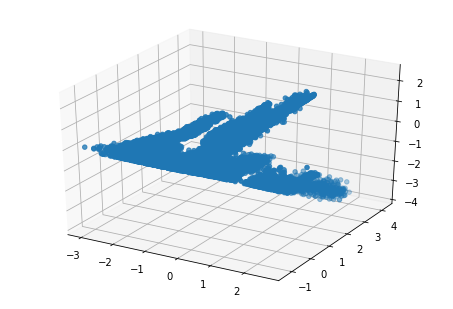

In [7]:
# Plot 3D figure
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data3D['V1'], data3D['V2'], data3D['V3'])

In [8]:
X, y = make_blobs(n_samples=data3D.size, n_features=3, centers=k)
X = data3D

In [26]:
# Initializing KMeans
kmeans = KMeans(k)
# Fitting with inputs
kmeans = kmeans.fit(X)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
print(C[:,0])

[ 1.36909434 -0.49733124  0.56315825  0.47061387  1.53307689 -1.44453479
  0.59117809  1.78106539 -0.57788927  0.5525915  -0.17617132  1.79158161
  0.28872421  1.08713736 -1.97002317  1.48669136 -0.13731899  0.29416108
 -0.88592353  0.97894035  0.31856349 -0.98620129 -1.39580041  0.42591453
 -0.44139589]


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


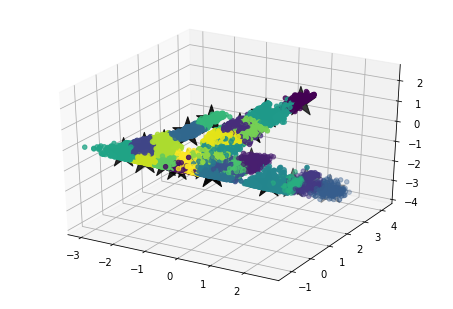

In [32]:
fig = plt.figure()
ax = Axes3D(fig)
#Instead of using colours for each predefined cluster, we use a colour for each predicted label
ax.scatter(data3D['V1'], data3D['V2'], data3D['V3'], c=labels)
# ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#050505', s=1000)
# C is a matrix indexed as such
ax.scatter(C[:,0], C[:,1], C[:,2], marker='*', c='#050505', s=1000)